In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import ast 

In [33]:
data_by_year = pd.read_csv('data_by_year.csv')
data_by_year.set_index('year', inplace=True)
data_by_year.drop(columns=['mode'], inplace=True)
# Scale the data so that everything can be plot on the same axis
scaler = StandardScaler()
data_by_year[data_by_year.columns] = scaler.fit_transform(data_by_year[data_by_year.columns])
data_by_year.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
year,,,,,,,,,,,,
1921,1.206593,-2.268729,1.303465,-1.372612,1.241416,-0.141117,-1.643865,-0.394037,-2.567559,-2.656372,-1.297256,-0.504959
1922,1.395278,-1.050819,-2.424439,-1.335327,1.974278,1.824215,-2.364442,0.132090,-2.682246,0.059618,-1.322135,1.751841
1923,1.463369,0.778558,-1.935347,-1.182517,1.461764,1.079979,-0.699070,-0.145779,-0.355409,1.623313,-1.067354,-1.069159
1924,1.401148,0.251686,-1.421483,-0.673342,3.184595,1.515427,-0.732122,-0.168531,0.828525,2.288008,-1.296883,1.751841
1925,1.482933,0.711808,-1.659106,-1.081931,1.843836,1.652901,-0.704637,0.074121,-0.087526,1.561357,-1.202546,0.341341


<Figure size 1728x864 with 0 Axes>

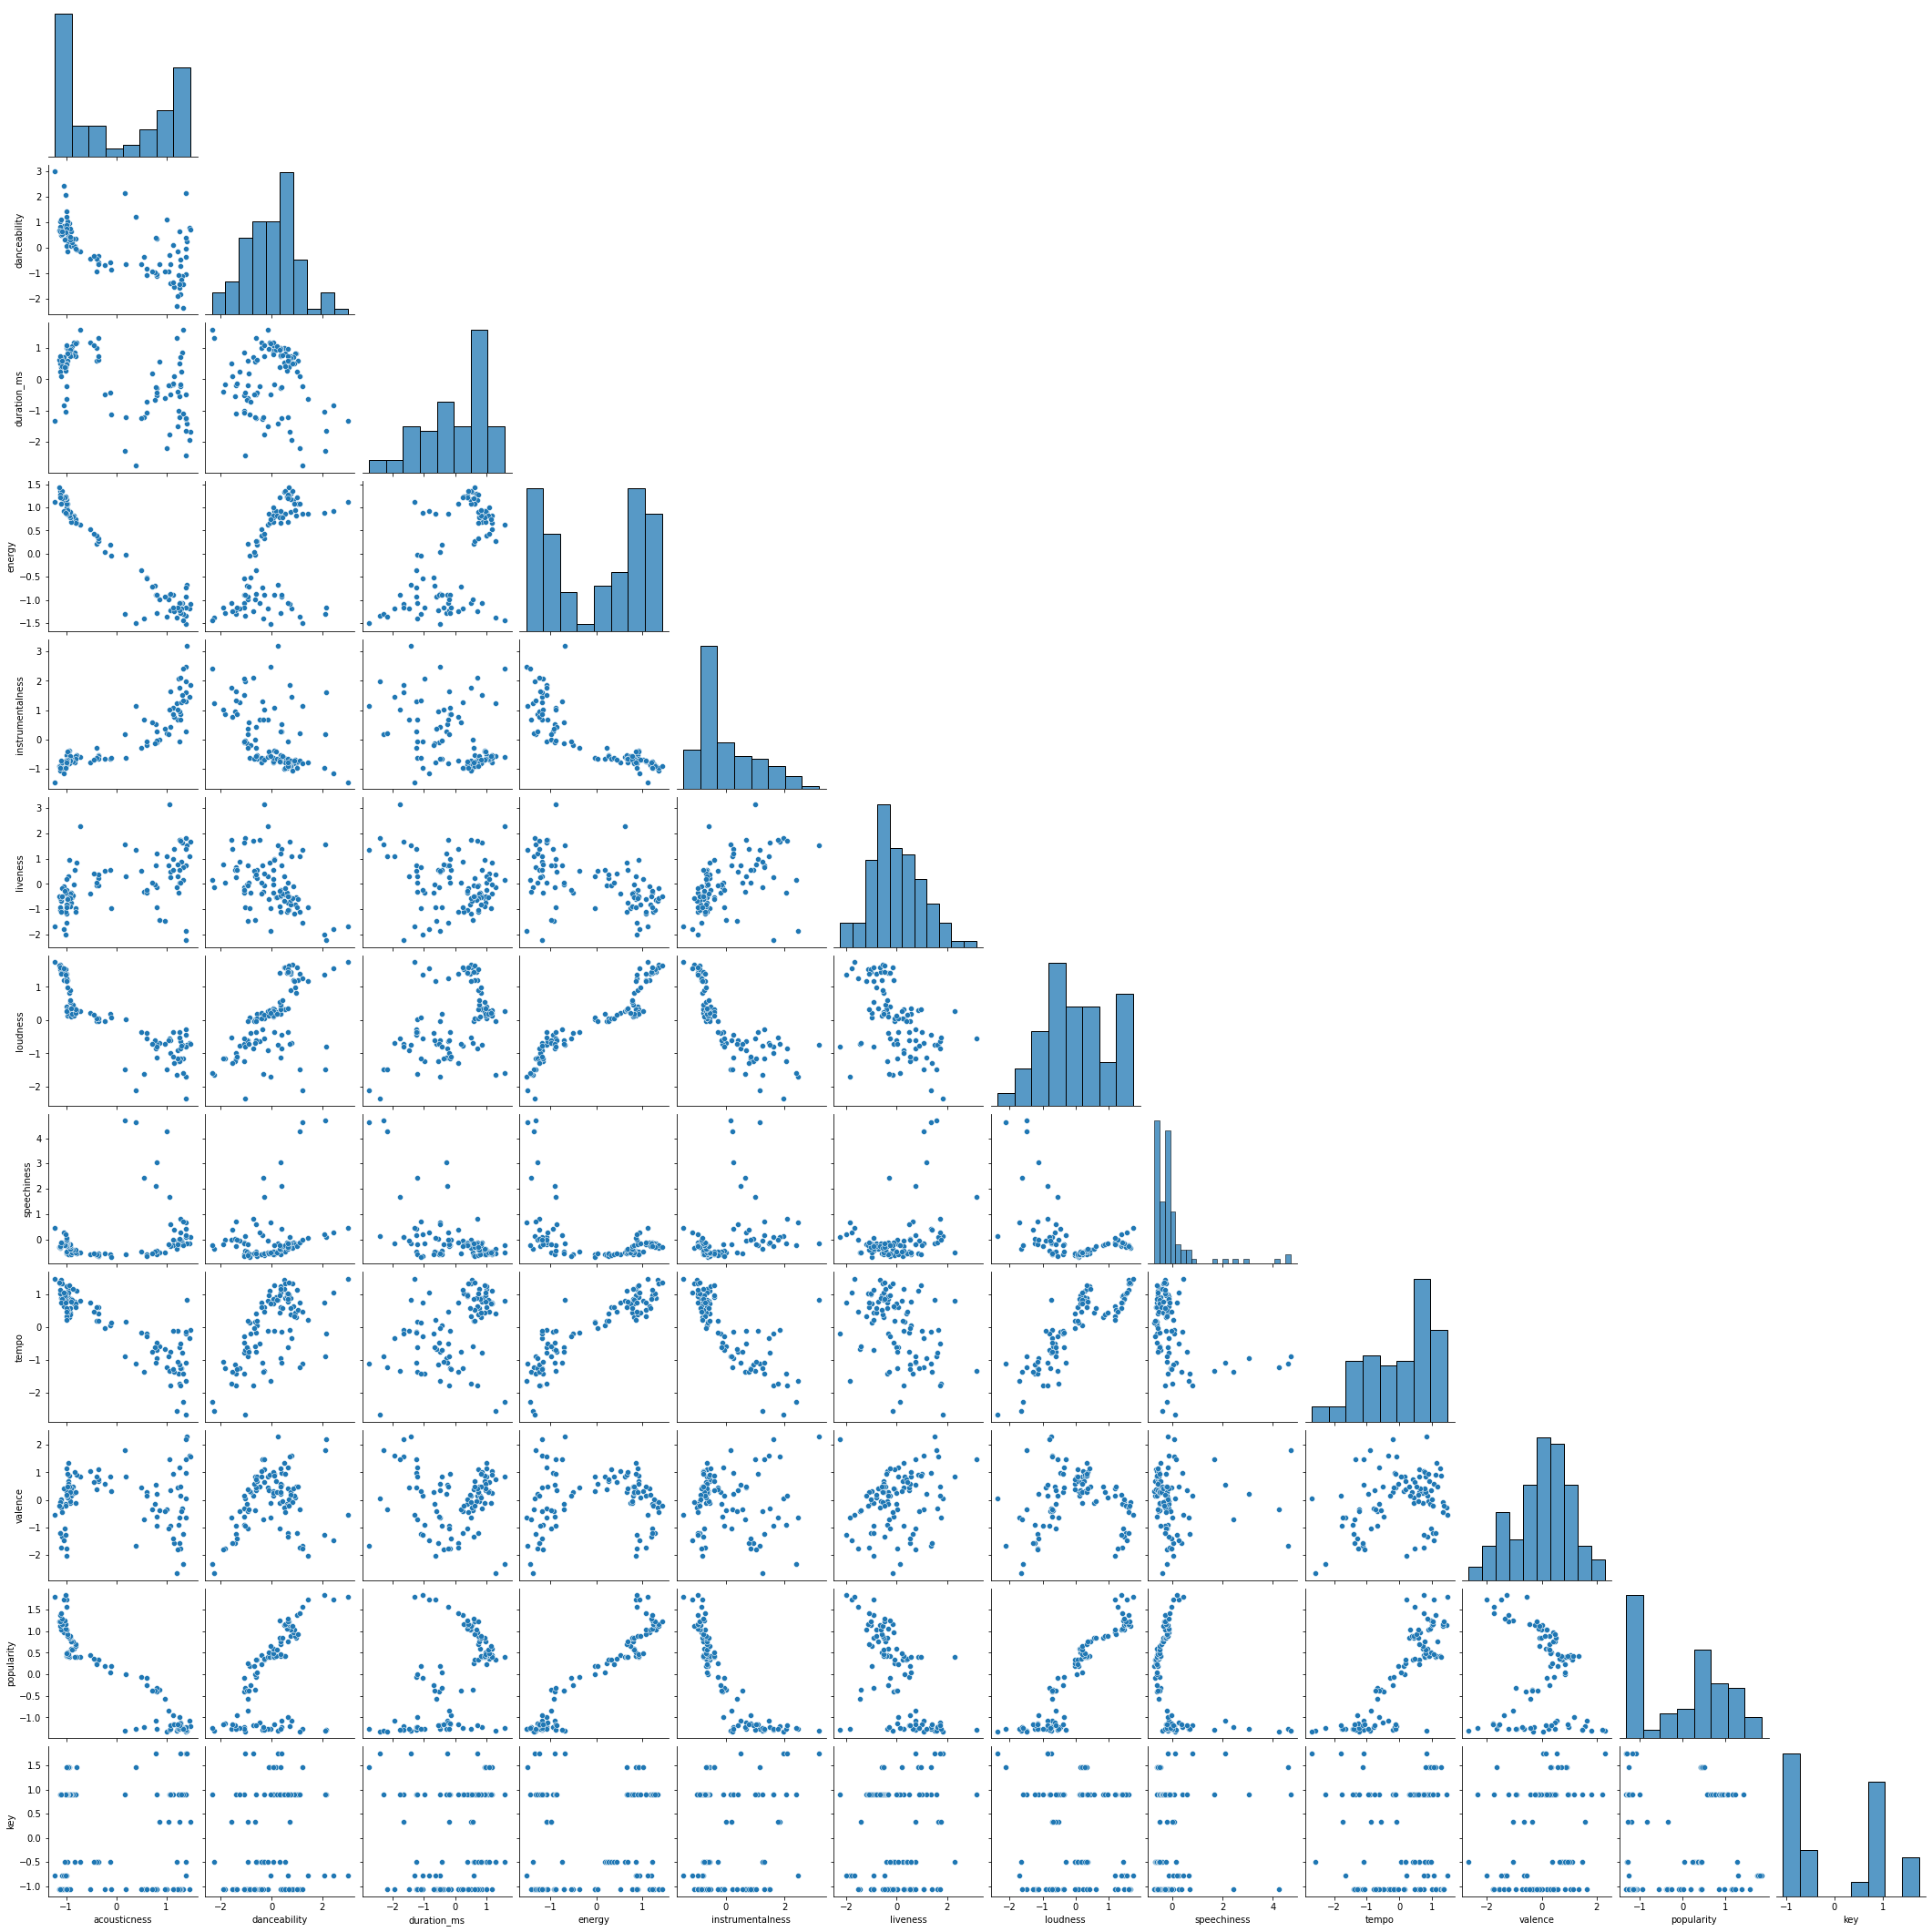

In [35]:
plt.figure(figsize=(24, 12))
sns.pairplot(data_by_year, corner=True)

<AxesSubplot:xlabel='year'>

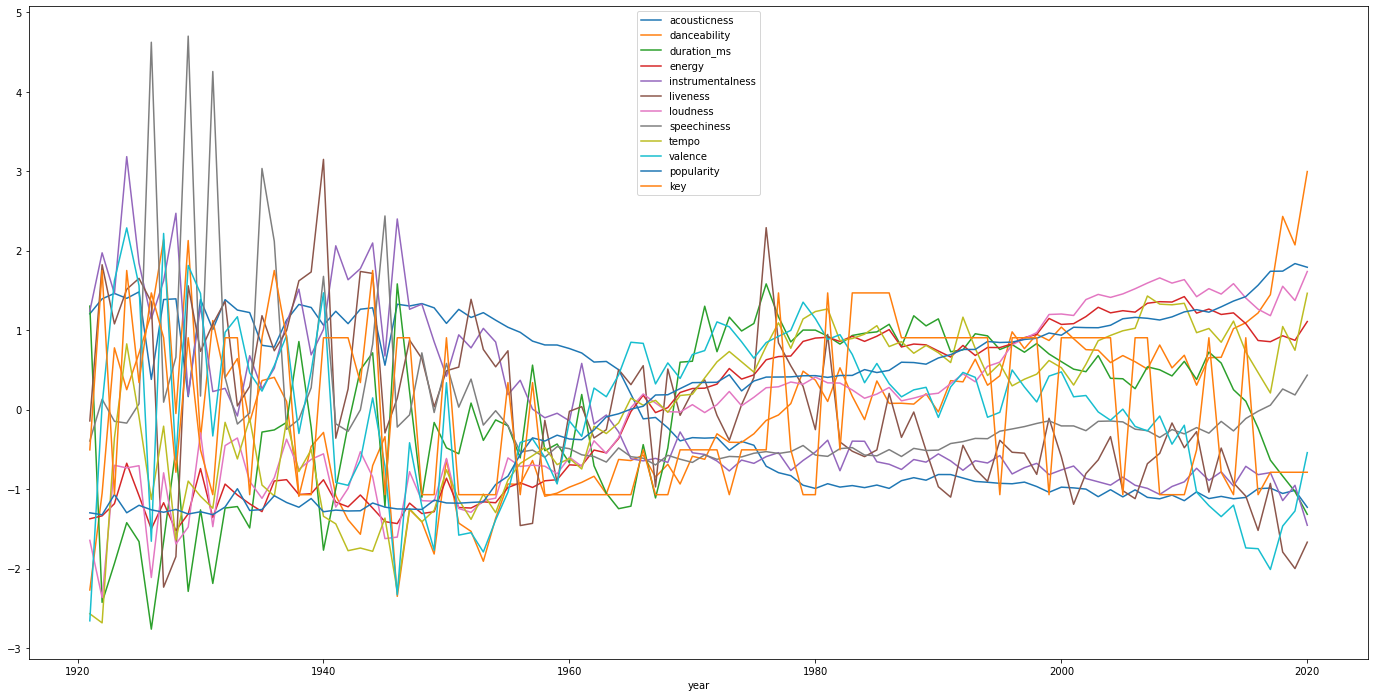

In [38]:

data_by_year.plot(kind='line', figsize=(24, 12))

### This is a lot to process / it's basically incomprehensible, so let's get the rolling avg

<AxesSubplot:xlabel='year'>

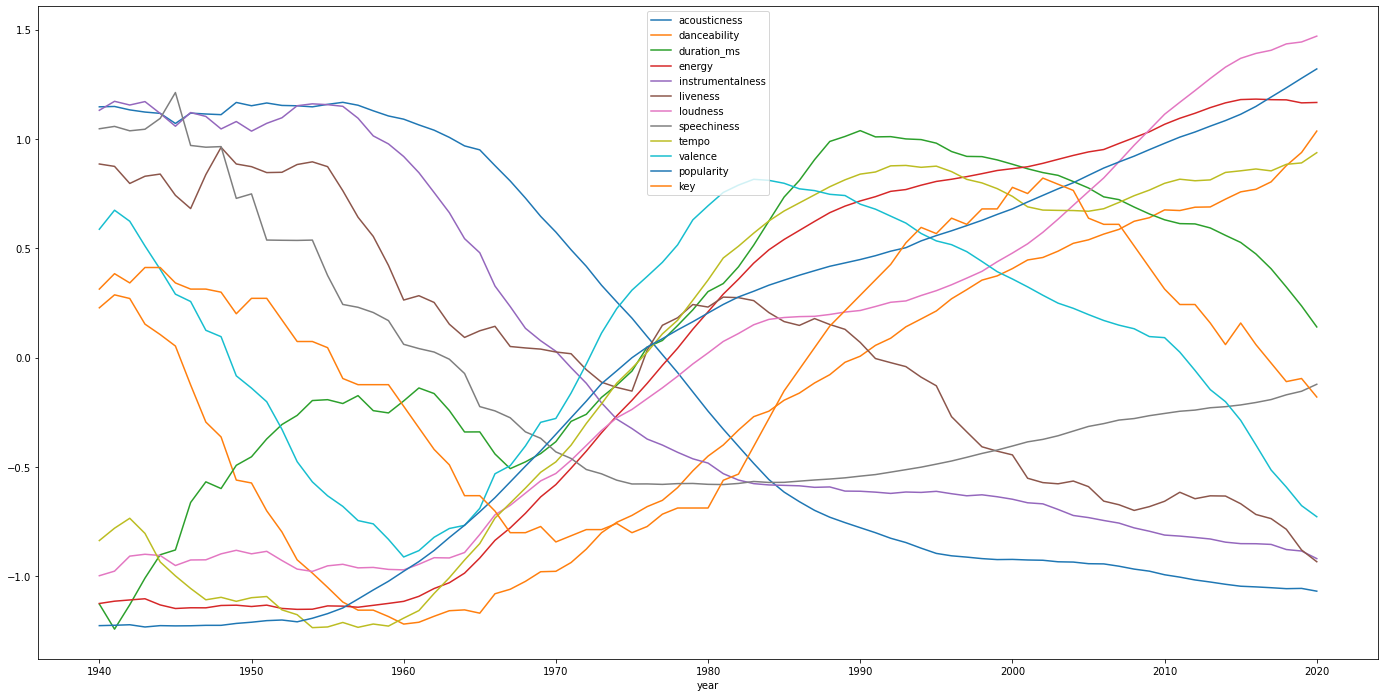

In [46]:
data_by_year_avg = data_by_year.rolling(20).mean()
data_by_year_avg.dropna(axis=0, inplace=True)
data_by_year_avg.plot(kind='line', figsize=(24, 12))

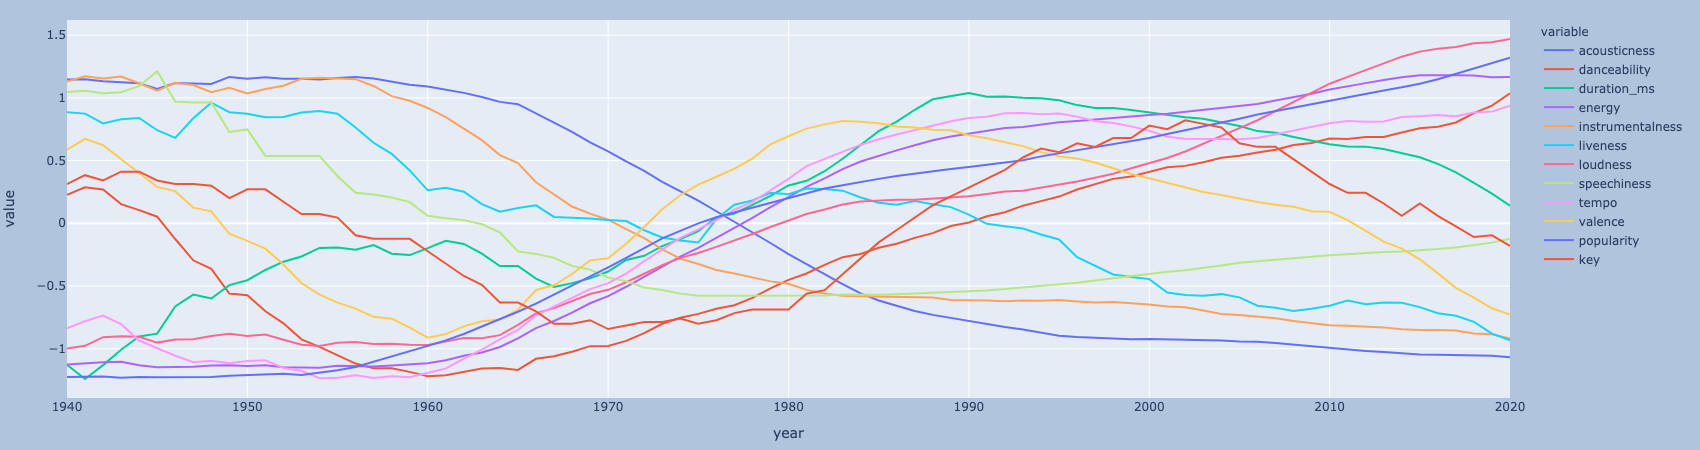

In [47]:
# Here is a plotly visualization, which is much nicer to look at but doesn't render in Github
import plotly.express as px
fig = px.line(data_by_year_avg)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

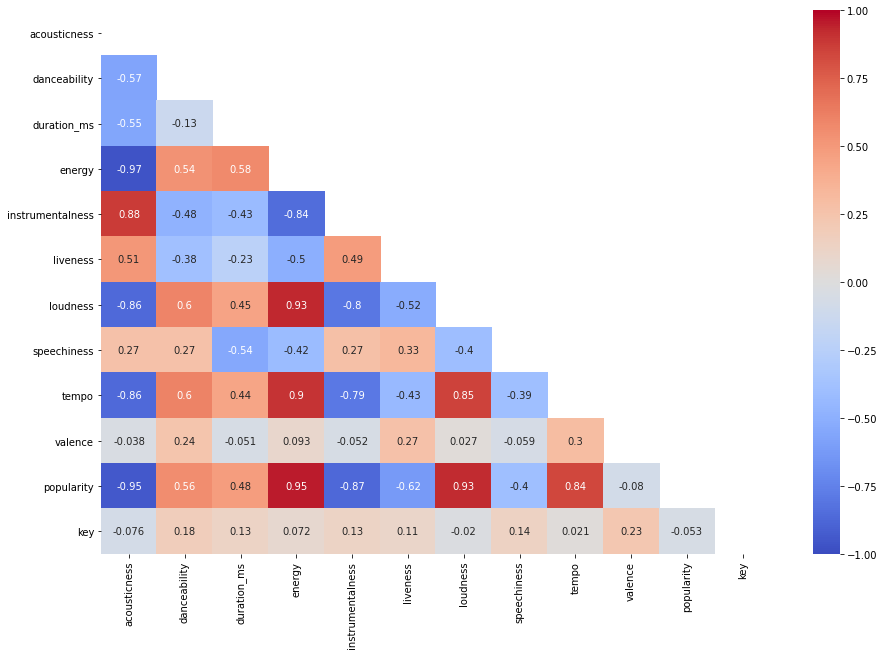

In [45]:
import numpy as np
mask = np.zeros_like(data_by_year.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(
    data_by_year.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.
);

In [50]:
data_by_year.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
acousticness,1.000000,-0.569333,-0.554853,-0.966941,0.875157,0.512743,-0.862492,0.272147,-0.860516,-0.037674,-0.945010,-0.076447
danceability,-0.569333,1.000000,-0.126474,0.538292,-0.476947,-0.384653,0.595862,0.266629,0.603543,0.242717,0.560226,0.179367
duration_ms,-0.554853,-0.126474,1.000000,0.575664,-0.425268,-0.228064,0.446172,-0.544206,0.437509,-0.050771,0.484321,0.128262
energy,-0.966941,0.538292,0.575664,1.000000,-0.844761,-0.500540,0.933191,-0.420854,0.902943,0.092576,0.953637,0.071746
instrumentalness,0.875157,-0.476947,-0.425268,-0.844761,1.000000,0.489357,-0.800334,0.273937,-0.793371,-0.051677,-0.872021,0.131505
liveness,0.512743,-0.384653,-0.228064,-0.500540,0.489357,1.000000,-0.522916,0.332920,-0.434890,0.266866,-0.623418,0.107720
loudness,-0.862492,0.595862,0.446172,0.933191,-0.800334,-0.522916,1.000000,-0.398779,0.853266,0.027468,0.928369,-0.020220
speechiness,0.272147,0.266629,-0.544206,-0.420854,0.273937,0.332920,-0.398779,1.000000,-0.391702,-0.059108,-0.398338,0.139448
tempo,-0.860516,0.603543,0.437509,0.902943,-0.793371,-0.434890,0.853266,-0.391702,1.000000,0.304187,0.843231,0.021341
valence,-0.037674,0.242717,-0.050771,0.092576,-0.051677,0.266866,0.027468,-0.059108,0.304187,1.000000,-0.079516,0.230384


In [52]:
df_w_genres = pd.read_csv('data_w_genres.csv')

In [53]:
print('len before: ', len(df_w_genres))
df_w_genres = df_w_genres[df_w_genres['genres'] !='[]']
print('len after: ', len(df_w_genres))

len before:  28680
len after:  18823


In [55]:
df_w_genres.reset_index(drop=True, inplace=True)
df_w_genres['genre_summary'] = df_w_genres['genres'].copy()
df_w_genres['genre_summary'] = df_w_genres['genres'].apply(lambda x: ast.literal_eval(x)[0].split(' ')[-1])

df_w_genres = df_w_genres[df_w_genres['genre_summary'] != 'music']
df_w_genres = df_w_genres[df_w_genres['genre_summary'] != 'band']
df_w_genres = df_w_genres[df_w_genres['genre_summary'] != 'corrido']
df_w_genres['genre_summary'] = df_w_genres['genre_summary'].replace(['hop'],'hip hop')
df_w_genres['genre_summary'] = df_w_genres['genre_summary'].replace(['standards'],'jazz')
df_w_genres['genre_summary'] = df_w_genres['genre_summary'].replace(['performance'],'classical')
df_w_genres['genre_summary'] = df_w_genres['genre_summary'].replace(['folk'],'folk music')
df_w_genres['genre_summary'] = df_w_genres['genre_summary'].replace(['tunes'],'show tunes')

values = df_w_genres['genre_summary'].value_counts()
df_w_genres['genre_summary_num'] = df_w_genres['genre_summary'].apply(lambda x: values[x])
pd.set_option('display.max_rows', 400)
df_w_genres = df_w_genres[df_w_genres['genre_summary_num'] > 300]
df_w_genres.drop(columns=['genres', 'genre_summary_num'], inplace=True)
df_w_genres.reset_index(inplace=True, drop=True)

In [58]:
genre_attributes = df_w_genres.groupby('genre_summary').agg('mean')
genre_attributes

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
genre_summary,,,,,,,,,,,,,,
classical,0.914422,0.314066,329879.449456,0.171092,0.532464,0.177933,-20.359040,0.055543,102.273934,0.233001,19.027377,5.066038,0.850943,45.852830
country,0.322680,0.580718,219616.603327,0.592035,0.021967,0.176570,-8.437431,0.047554,121.313662,0.555902,46.375098,6.020677,0.949248,24.387218
hip hop,0.174787,0.721694,248763.306102,0.675070,0.025247,0.210986,-7.201208,0.211954,115.216641,0.574782,50.142915,5.375510,0.647619,18.327891
jazz,0.651202,0.525240,237628.634847,0.398539,0.233988,0.182806,-12.699710,0.055166,113.255077,0.530638,31.395069,5.172196,0.796209,53.377567
metal,0.061564,0.444633,254557.327311,0.829609,0.135236,0.213237,-6.348745,0.083115,126.501188,0.405484,45.330642,5.419565,0.782609,24.123913
pop,0.352774,0.595508,222165.156797,0.588920,0.058634,0.179839,-8.580698,0.071960,119.465142,0.550246,48.037799,5.520677,0.756109,14.757989
rap,0.180603,0.733042,224934.307918,0.629660,0.017421,0.191540,-7.444846,0.200402,117.500874,0.521528,54.553097,5.249629,0.653789,11.478455
rock,0.218249,0.534460,250393.104328,0.652520,0.104490,0.202798,-9.222598,0.058594,123.120868,0.563311,42.019529,5.620486,0.839133,34.844386
soul,0.380843,0.612151,244568.256218,0.532185,0.045056,0.177281,-9.865344,0.067519,116.626921,0.620424,39.762174,5.655280,0.748447,19.099379


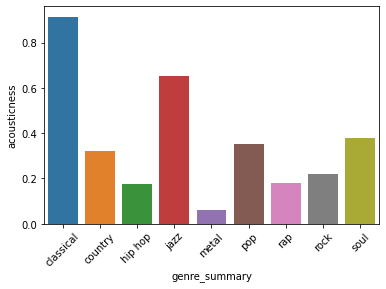

In [71]:
plt.xticks(rotation=45);
sns.barplot(x=genre_attributes.index, y=genre_attributes['acousticness']);

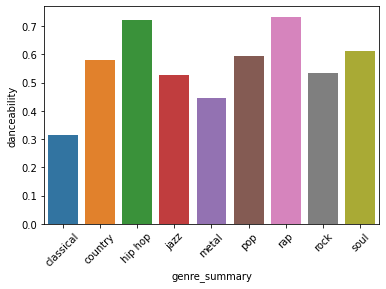

In [72]:
plt.xticks(rotation=45);
sns.barplot(x=genre_attributes.index, y=genre_attributes['danceability']);

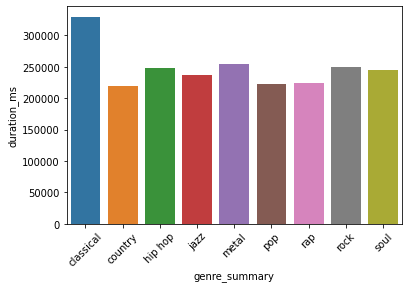

In [73]:
plt.xticks(rotation=45);
sns.barplot(x=genre_attributes.index, y=genre_attributes['duration_ms']);

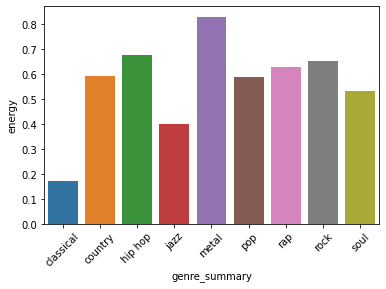

In [74]:
plt.xticks(rotation=45);
sns.barplot(x=genre_attributes.index, y=genre_attributes['energy']);

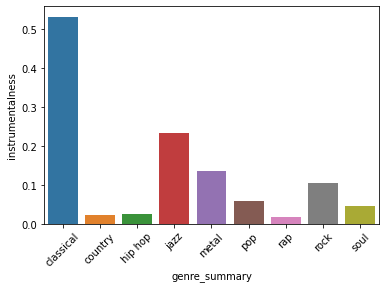

In [75]:
plt.xticks(rotation=45);
sns.barplot(x=genre_attributes.index, y=genre_attributes['instrumentalness']);

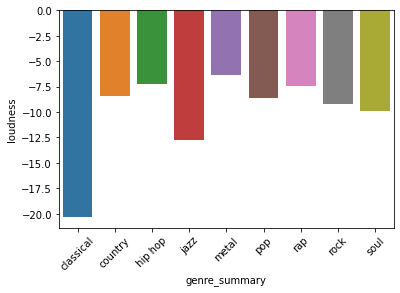

In [77]:
plt.xticks(rotation=45);
sns.barplot(x=genre_attributes.index, y=genre_attributes['loudness']);

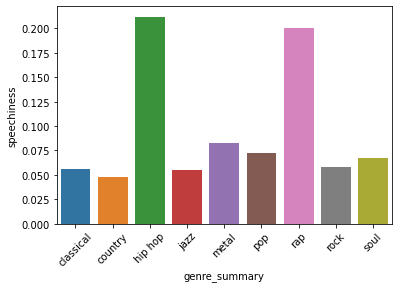

In [78]:
plt.xticks(rotation=45);
sns.barplot(x=genre_attributes.index, y=genre_attributes['speechiness']);

## Visualizing popularity

In [86]:
df = pd.read_csv('data.csv')
df = df[df['popularity'] != 0]
df['primary_artist'] = df['artists'].apply(lambda x: ast.literal_eval(x)[0])
df['title_artist'] = df['name'] + ' ' + df['primary_artist']
df['title_artist_search_term'] = ['%20'.join(search.split(' ')) for search in df['title_artist']]
df = df.sort_values(by='popularity', ascending=False)

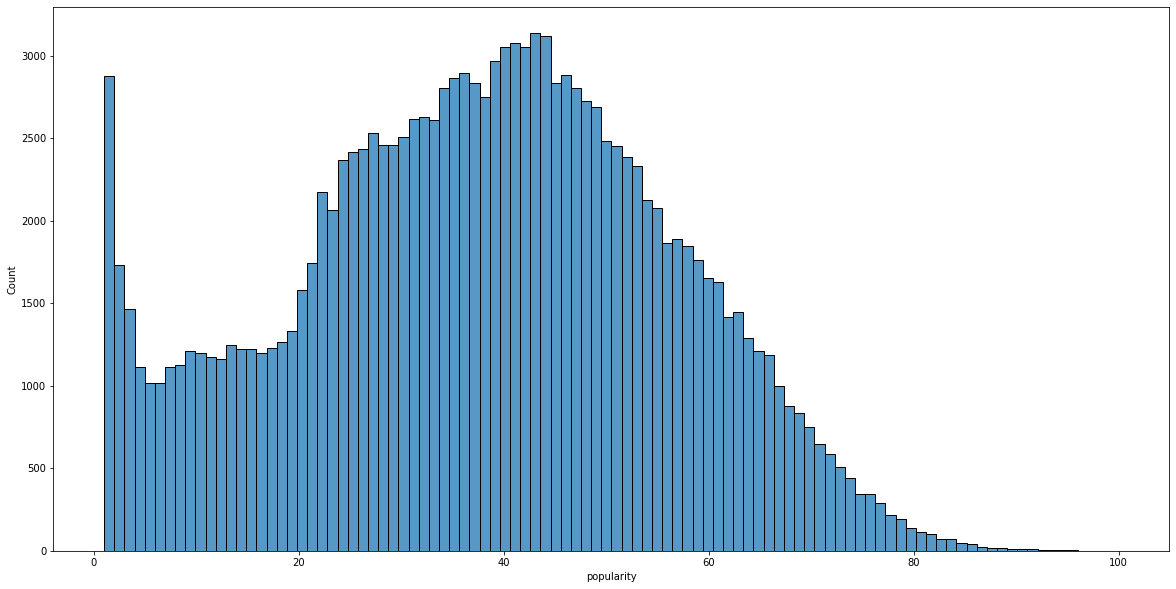

In [87]:
# px.histogram(df, x='popularity')
plt.figure(figsize=(20,10))
sns.histplot(df, x='popularity');

## Looking at data in merged tables

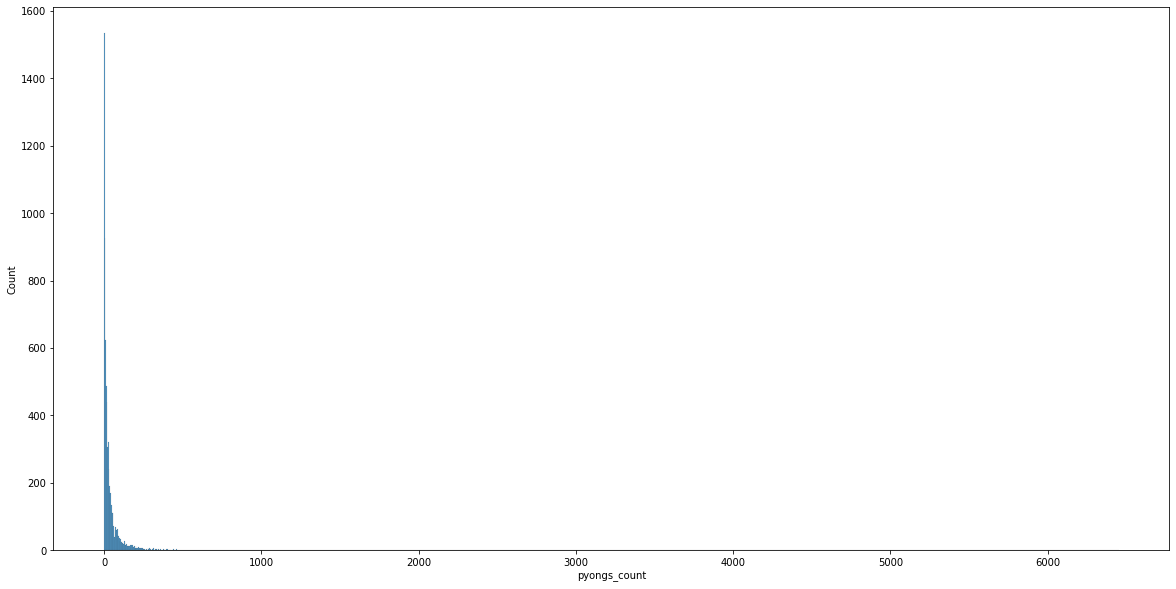

In [88]:
plt.figure(figsize=(20,10))
sns.histplot(df_all, x='pyongs_count');

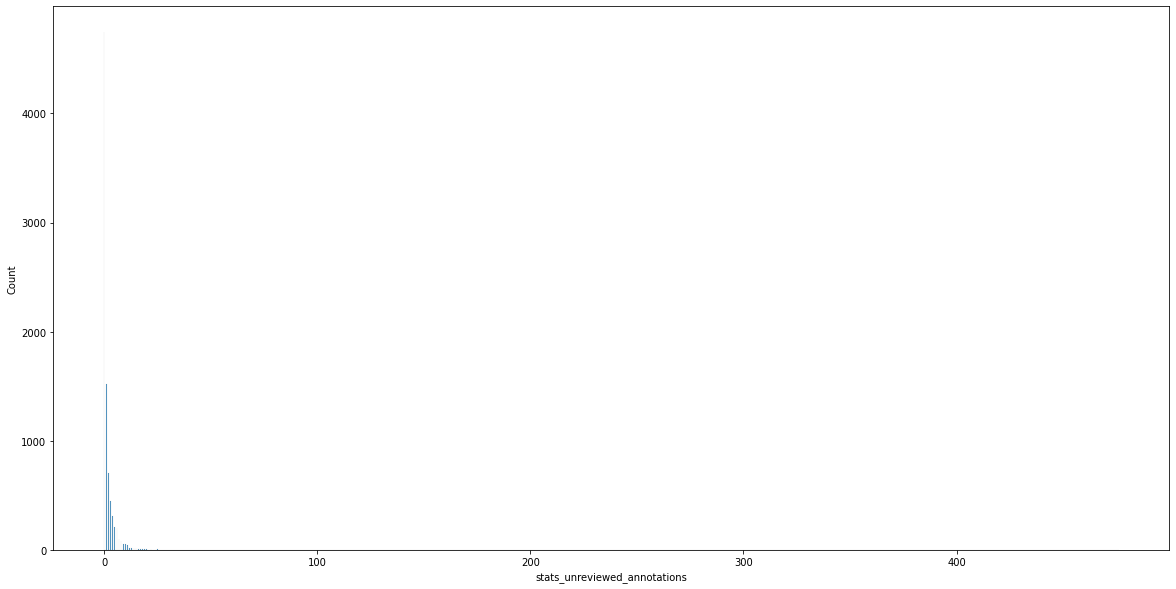

In [89]:
plt.figure(figsize=(20,10))
sns.histplot(df_all, x='stats_unreviewed_annotations');

## Now that we've taken a deeper look at the data, we have a better sense of what the data can tell us and, importantly, what it cannot tell us